In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy

from enum import Enum

In [2]:
dictionary = {
    'data_0' : 'result_[0]_new.npy',
    'data_0.005' : 'result_[0.005].npy',
    'data_0.05' : 'result_[0.05].npy',
    'data_0.1' : 'result_[0.1].npy',
    'data_0.5' : 'result_[0.5].npy'
}

data = {}

for key, file_name in dictionary.items():
    data[key] = np.load(file_name)

In [3]:
for i in data.items():
    print(i[1][0])

[[ 0.01        4.49994898  0.78591651 ...  1.57345736 -0.92407668
   0.78539819]
 [ 0.013       4.49995995  0.78553802 ...  1.57591987 -0.92614889
   0.78539819]
 [ 0.016       4.49992466  0.78553408 ...  1.57594919 -0.92616701
   0.78539819]
 ...
 [ 6.27699995  4.4986887   0.78849256 ...  7.7925849  -0.92876917
   0.78593403]
 [ 6.28000021  4.49852133  0.78849256 ...  7.7925849  -0.92876917
   0.78593403]
 [ 6.28299999  4.49834299  0.78849238 ...  7.79258537 -0.92877293
   0.78593379]]
[[ 0.01        4.09075069  0.78544605 ...  1.04377902 -1.05750525
   0.78539819]
 [ 0.02        4.09075689  0.78540456 ...  1.05405033 -1.05528319
   0.78541768]
 [ 0.03        4.09075403  0.78539407 ...  1.0636996  -1.0549643
   0.78541732]
 ...
 [ 6.25999975  4.09075022  0.78539354 ...  7.29337597 -1.05490565
   0.73332405]
 [ 6.26999998  4.09074736  0.78540295 ...  7.30312634 -1.05486941
   0.73311073]
 [ 6.27999973  4.09075403  0.78539675 ...  7.31372881 -1.05488932
   0.73287964]]
[[ 0.01        2.

In [4]:
# [2-qubit]
class INDEX(Enum):
    PHI = 0
    CFI = 1
    
    THETA_X = 2
    
    PHI_Z1 = 3
    PHI_Z2 = 4
    
    TAU_1 = 5
    TAU_2 = 6

In [5]:
class DataPlotter:
    def __init__(self, data_in):
        self.data_in = data_in
        
    def plot_cfi(self, tau_dephase = 0, gamma_ps = 0):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.CFI.value],
            label = f'$\\tau$ = {tau_dephase}'
        )
        plt.title(f'CFI at $\gamma_{{ps}} = {gamma_ps}$')
        plt.xlabel('Time')
        plt.ylabel('CFI')
        plt.grid()
        plt.legend()
        
    def plot_theta_x(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.THETA_X.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\theta_{{x}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z1(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z1.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z1}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z2}}$',
            ylim = set_ylim
        )
        
    def plot_tau_1(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_1.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{1}}$',
            ylim = set_ylim
        )
        
    def plot_tau_2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{2}}$',
            ylim = set_ylim
        )
        
    def plot_setting(self, title, xlabel='Time', ylabel='Rad', ylim =(-2*np.pi, 2*np.pi)):
        plt.yticks(
            [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, (3*np.pi)/2, 2*np.pi, 5*np.pi/2], 
            ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$3\pi/2$', '$2\pi$', '$5\pi/2$']
        )
        plt.ylim(ylim)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid()
        plt.legend()

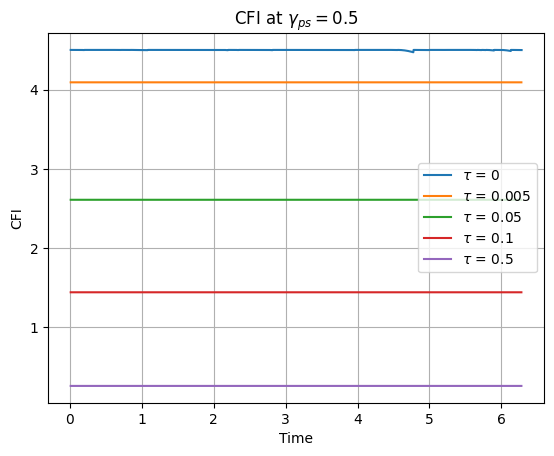

In [6]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_cfi(tau_dephase = current_tau, gamma_ps=0.5)

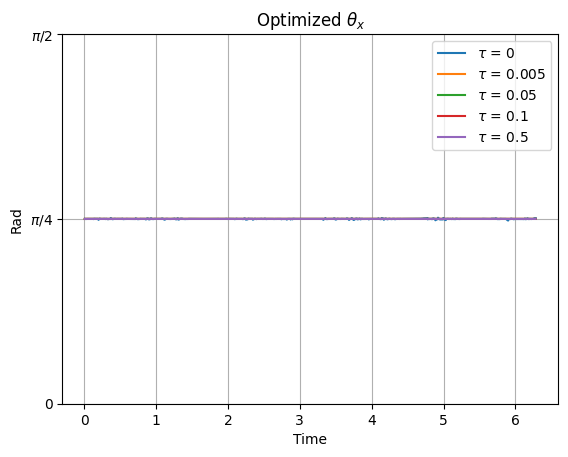

In [7]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_theta_x(tau_dephase=current_tau, set_ylim=(0, 2*np.pi/4))

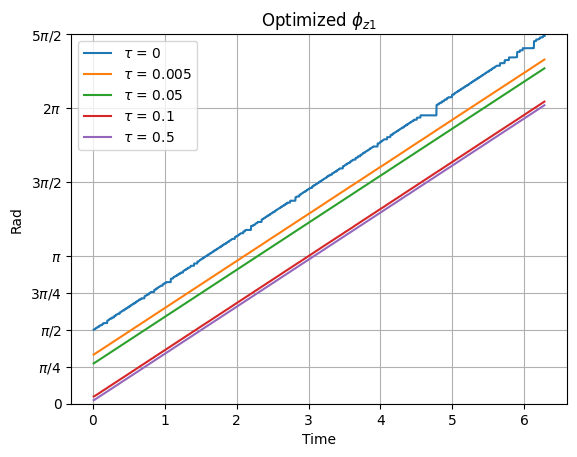

In [8]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z1(tau_dephase=current_tau, set_ylim=(0, 5*np.pi/2))

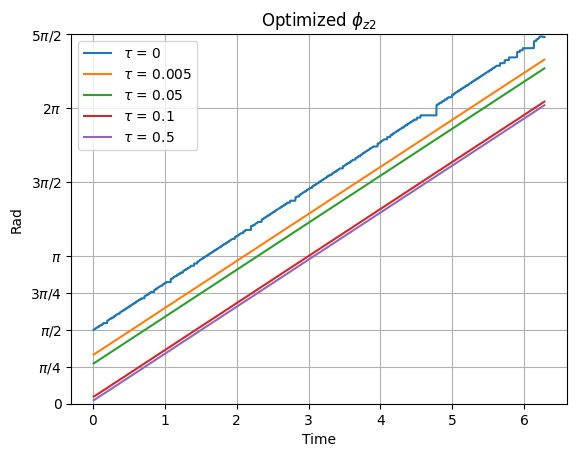

In [9]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z2(tau_dephase=current_tau, set_ylim=(0, 5*np.pi/2))

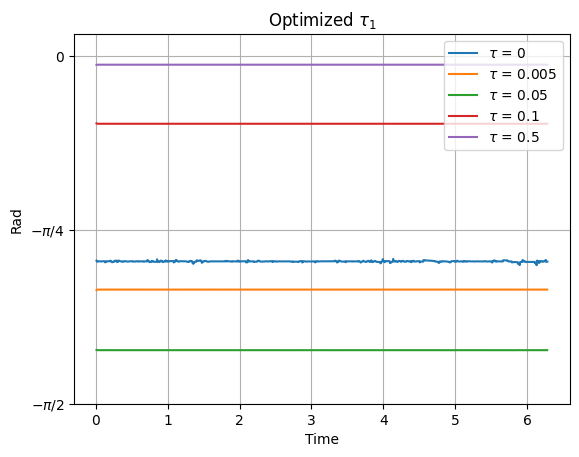

In [10]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_1(tau_dephase=current_tau, set_ylim=(-np.pi/2, 1e-1))

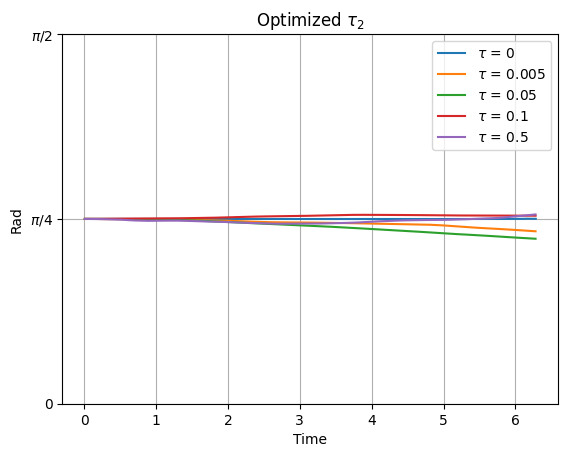

In [11]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_2(tau_dephase=current_tau, set_ylim=(0, np.pi/2))